# Model fitting with Astropy

Astropy currently provides a number of 1D and 2D models and the methodology to fit them.

We will discuss a couple of examples here.

## Using the models as functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.modeling import models, fitting

In [3]:
sin_mod=models.Sine1D(amplitude=2.,frequency=0.1,phase=0.1)
print(sin_mod)

Model: Sine1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude frequency phase
    --------- --------- -----
          2.0       0.1   0.1


Model parameters can be accessed and change by attributes

In [6]:
sin_mod.amplitude=3.

Models can be evaluated by calling them as functions.

In [7]:
sin_mod(0)

1.7633557568774194

Text(0,0.5,'Amplitude')

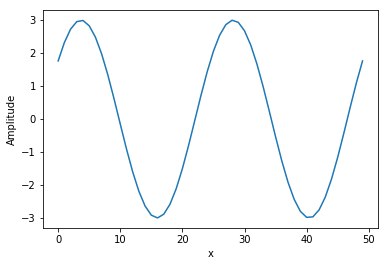

In [11]:
plt.plot(sin_mod(np.linspace(0,20,50)))
plt.xlabel('x')
plt.ylabel('Amplitude')

## Model fitting

Suppose we had measured some physical process that was represented by a sine curve. Let us suppose we are measuring the amplitude of some process as a function of time. More often than not, the measurement will not be accurate and be subject to some noise or uncertaintity. Let us recreate such a set of data - this technique is referred to as creating synthetic data.

To create the synthetic data, we start with the true values of the sine curve. The amplitude is 2, the period is 40 s and the phase is 0.1.

Assume that we make this measurement every one second for a hundred measurements. 

Text(0,0.5,'Measured Amplitude')

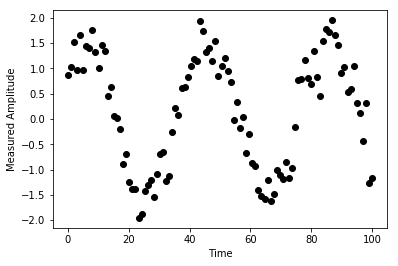

In [44]:
# Create data sampling
t=np.linspace(0,100,100)
amp=1.5*np.sin(2.*np.pi/40*t+2.*np.pi*0.1)

#Add some noise
rand=np.random.RandomState(21) #set fixed random state for repeatablity
errors=rand.normal(scale=0.3,size=t.shape)

y=amp+errors

# Plot the synthetic data
plt.plot(t,y,'ko')
plt.xlabel('Time')
plt.ylabel('Measured Amplitude')

To fit our data, we will need to instantiate a model (i.e. create an object instance) and then choose a method for fitting the data.

The sine model now is given initial guesses for each parameter.

We also use the Levenberg-Marquardt algorithm for fitting the model to the data.

In [58]:
mod_init=models.Sine1D(amplitude=2.0,frequency=0.03,phase=0.3)
fit_mod=fitting.LevMarLSQFitter()
sin_fit=fit_mod(mod_init,t,y)

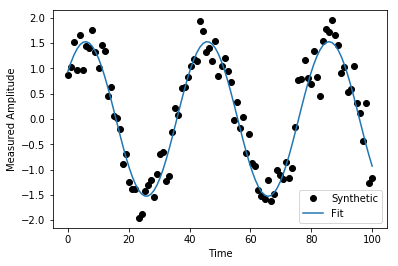

In [59]:
# Plot the synthetic data and fit
plt.plot(t,y,'ko',label='Synthetic')
plt.xlabel('Time')
plt.ylabel('Measured Amplitude')
plt.plot(t,sin_fit(t),label='Fit')
plt.legend()


In [53]:
1./0.03

33.333333333333336